## Bresenham 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

Your task is to implement the bresenham function given two points $p_1$ and $p_2$ as inputs. The function should return the list of grid cells required to draw the line.

What conditions would warrant a move by 1 unit along the x-axis? What about along the y-axis?

The idea is to move based on whether the next $y$ value will be above or below the line from $p_1$ to $p_2$. We can keep track of the current line value, effectively $f(x)$ where $f$ is the line equation by incrementing a counter variable by the slope $m$ whenever we move in the x-axis.

The condition is then (in pseudocode):

```
if f(x+1) > y + 1:
    y += 1
else:
    x += 1
```

So, if moving along the y-axis results in a y value that is below the line, then move along the y-axis, otherwise,  move in the x-axis.

But what about the case where `f(x+1) == y+1`? This will be the result of every test case when the line slope `m = 1`. In this case you have a choice to make:
* Only identify cells that as "in collision" when the line actually passes through those cells (less conservative obstacle avoidance)
* When the line passes directly through a corner of grid cells, identify all cells that share that corner as "in collision" (more conservative obstacle avoidance). 

These two options look like this for a line from (0, 0) to (5, 5):

![comparison](./bresenham_comparison.png)

Try coding up both! In the event that you've padded obstacles  in your grid map with a sufficient safety margin, you can likely get away with the less conservative approach (or computer graphics based Bresenham implementation in the Python package shown below).


In [29]:
def bres(p1, p2): 
    """
    Note this solution requires `x1` < `x2` and `y1` < `y2`.
    """
    x1, y1 = p1
    x2, y2 = p2
    cells = []
    
    # TODO: Determine valid grid cells
    dy = y2 - y1
    dx = x2 - x1
    m = 1. * dy/dx  # NOTE: float implementation
    
    # the lines start at (0, 0) so f(x) = mx + b = mx
    # the lines can always be translated to (0, 0)
    
    i, j = x1, y1
    while i < x2 and j < y2:  # strict inequalities will exclude last cell
        cells.append([i, j])
        mi1 = m * (i + 1)
        j1 = j + 1
        if mi1 < j1:
            i += 1
        elif mi1 > j1:
            j += 1
        else:
            i += 1
            j += 1
        
    return np.array(cells)

Plotting the line with the cells which it crosses. 

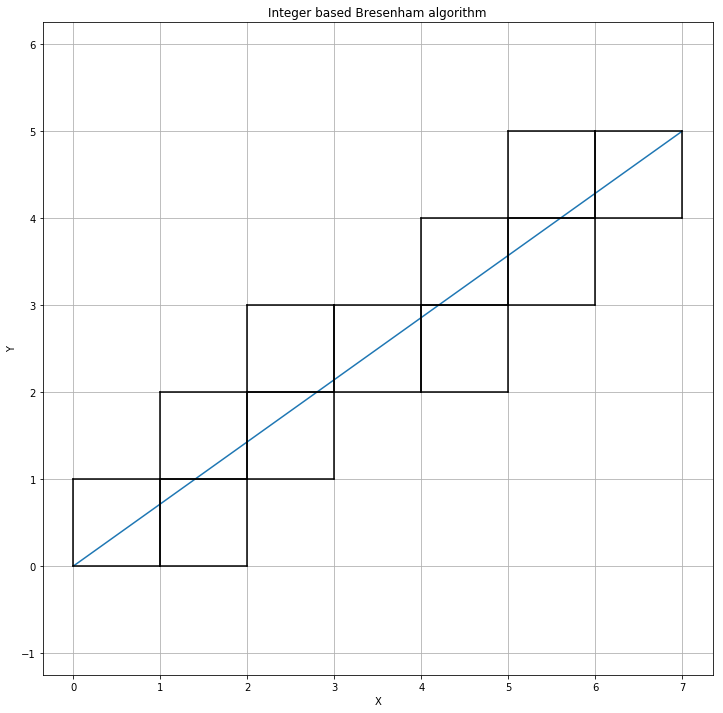

In [30]:
p1 = (0, 0)
p2 = (7, 5)

cells = bres(p1, p2)
# print(cells)

plt.plot([p1[0], p2[0]], [p1[1], p2[1]])


for q in cells:
    plt.plot([q[0], q[0]+1], [q[1], q[1]], 'k')
    plt.plot([q[0], q[0]+1], [q[1]+1, q[1]+1], 'k')
    plt.plot([q[0], q[0]], [q[1],q[1]+1], 'k')
    plt.plot([q[0]+1, q[0]+1], [q[1], q[1]+1], 'k')

plt.grid()
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Integer based Bresenham algorithm")
plt.show()

Check out our solution [here](/notebooks/Bresenham-Solution.ipynb).

### Python Bresenham Package
For comparison let's have a look at the Python Bresenham package! As mentioned above, if you've added a safety margin around obstacles you are probably fine using this package or one like it that misses some cells in collision with the line.

First we need to import it:

In [31]:
from bresenham import bresenham

Next we can run the same experiment as above and plot it up.

[(0, 0), (1, 1), (2, 1), (3, 2), (4, 3), (5, 4), (6, 4), (7, 5)]


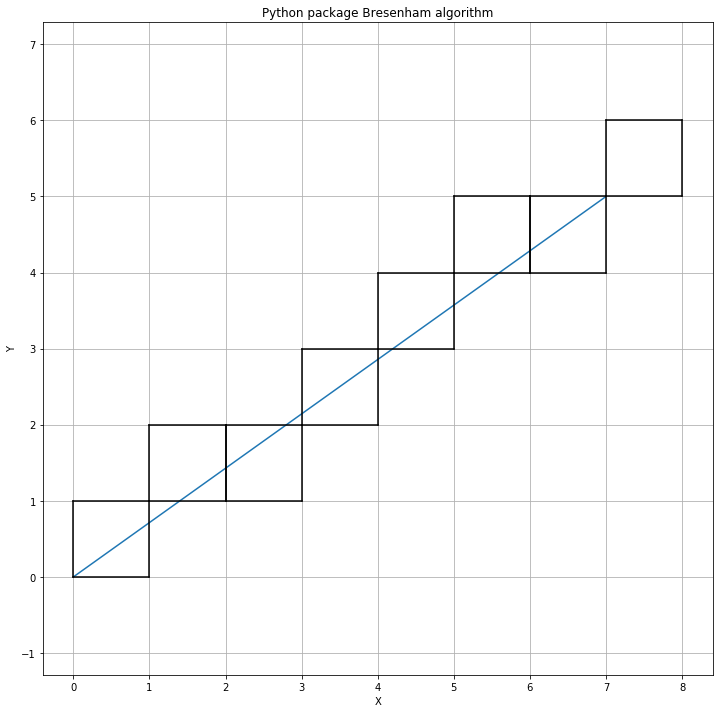

In [32]:
# Note: you can run this for any (x1, y1, x2, y2)
line = (0, 0, 7, 5)

cells = list(bresenham(line[0], line[1], line[2], line[3]))
print(cells)

plt.plot([line[0], line[2]], [line[1], line[3]])


for q in cells:
    plt.plot([q[0], q[0]+1], [q[1], q[1]], 'k')
    plt.plot([q[0], q[0]+1], [q[1]+1, q[1]+1], 'k')
    plt.plot([q[0], q[0]], [q[1],q[1]+1], 'k')
    plt.plot([q[0]+1, q[0]+1], [q[1], q[1]+1], 'k')

plt.grid()
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Python package Bresenham algorithm")
plt.show()